In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [148]:
# Handling missing values for the 'bmi' column by assigning the result back
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Data encoding
let's analyse data and convert data in 0's and 1's from  because the model knows only 0's and 1's values. 

In [150]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

In [151]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married','id'], axis=1, inplace=True)

In [121]:
df_model.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,1,0


**Now we only have the data which is in the form of 0's & 1's**

# Building ML Model

**Now,we can use it for traning a model**

In [152]:

X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
141,59.0,0,0,116.44,23.8,0,0,1,0,0,0,1
928,23.0,1,0,70.03,78.0,0,0,1,0,0,0,1
2748,54.0,0,0,92.34,29.4,0,0,1,0,0,0,1
2048,57.0,0,0,84.18,35.5,0,0,1,0,0,1,0
185,63.0,0,0,137.30,31.7,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2171,18.0,0,0,120.58,21.5,0,0,1,0,0,1,0
2064,73.0,0,0,82.13,28.5,0,0,1,0,0,1,0
4002,28.0,0,0,99.07,17.6,0,0,1,0,0,1,0
3602,49.0,0,0,104.08,26.6,0,0,0,0,0,1,0


## Basic Machine Learning Models

- Linear Regression
- Lasso Regression
- Ridge Regression
- Logistic Regression




## let's try these models on our dataset

## 1) Linear Regression

The logic behind the Linear Regression model lies in establishing a relationship between one or more independent variables (features) and a dependent variable (target) by fitting a straight line (or hyperplane in higher dimensions) that minimizes the error between actual and predicted values.

**Mathematical Equation**
- Linear Regression models the relationship using the equation:<br>
               y=β0 + (β1x1) + (β2 x2) + … + (βnxn ) + ϵ
- y: Dependent variable (target)
- 𝑥1,𝑥2,…,𝑥𝑛 
​
 : Independent variables (features)

- 𝛽0: Intercept (value of 𝑦
y when all 
𝑥
x values are 0)

- 𝛽
1
,
𝛽
2
,
…
,
𝛽
𝑛
: Coefficients (weights that represent the impact of each 
𝑥
x on 
𝑦
y)
- ϵ: Error term (accounts for variability not explained by the model)

In [153]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse_percentage = linear_reg_rmse*100
linear_reg_rmse_percentage

22.446848932027503

In [154]:
linear_reg.score(X_test, y_test)*100

7.373711934575777

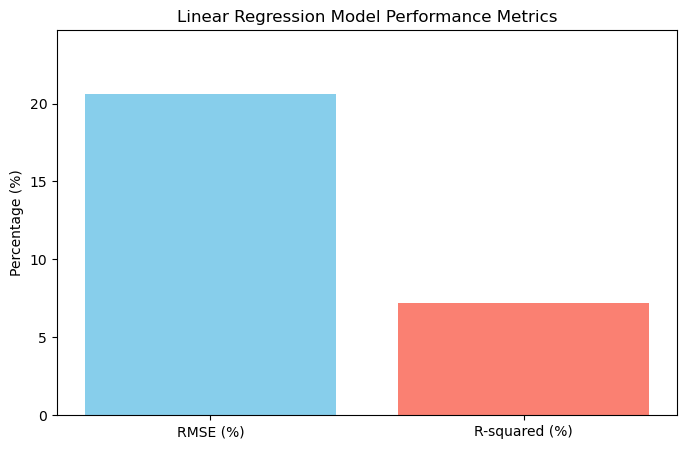

In [125]:
# Calculate RMSE and R-squared score
linear_reg_rmse_percentage = linear_reg_rmse * 100
linear_reg_r2_score = linear_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score side by side
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [linear_reg_rmse_percentage, linear_reg_r2_score]

plt.bar(metrics, values, color=['skyblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Linear Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding to the top of the y-axis for better visualization
plt.show()


**we got RMSE 22% and r-squared 9% for linear Regression**

## 2) Lasso Regression

The logic behind the Lasso Regression model is similar to Linear Regression but with an added feature: regularization. This technique helps prevent overfitting and simplifies the model by reducing less important feature weights (coefficients) to zero.

In [155]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.154053340756683

In [156]:
lasso_reg.score(X_test, y_test)*100

1.445252015176468

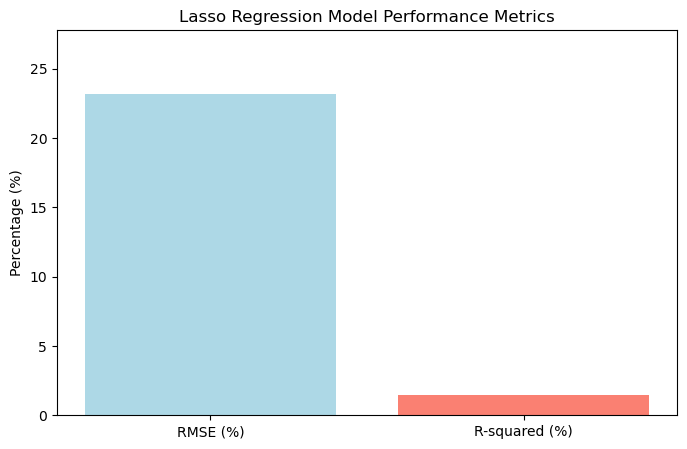

In [157]:
# Calculate RMSE and R-squared score in percentage
lasso_reg_rmse_percentage = lasso_reg_rmse * 100
lasso_reg_r2_score = lasso_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [lasso_reg_rmse_percentage, lasso_reg_r2_score]

plt.bar(metrics, values, color=['lightblue', 'salmon'])
plt.ylabel('Percentage (%)')
plt.title('Lasso Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding to the top for better visualization
plt.show()

**we got RMSE 23% and r-squared 1% for lasso Regression**

## 3) Rigid Regression

The logic behind Ridge Regression is to improve the performance of Linear Regression by addressing issues like overfitting and multicollinearity through regularization. It does this by adding a penalty to the size of the coefficients, which discourages extreme values.



In [158]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100


22.446642565041806

In [159]:
Rigid_reg.score(X_test, y_test)*100

7.375415061821366

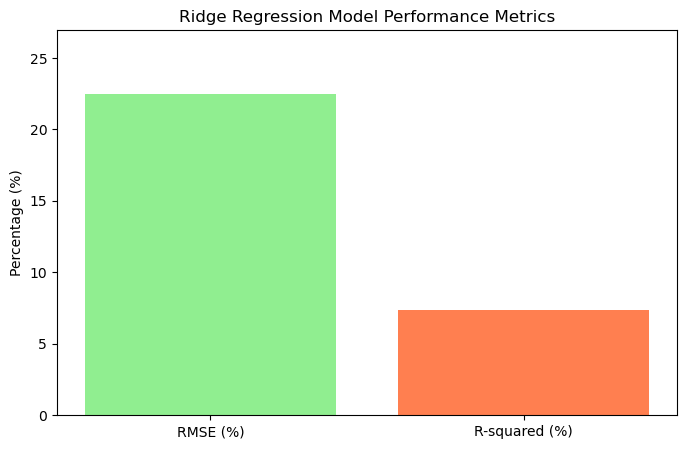

In [160]:
# Calculate RMSE and R-squared score in percentage
ridge_reg_rmse_percentage = Rigid_reg_rmse * 100
ridge_reg_r2_score = Rigid_reg.score(X_test, y_test) * 100

# Plotting RMSE and R-squared score for Ridge regression as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'R-squared (%)']
values = [ridge_reg_rmse_percentage, ridge_reg_r2_score]

plt.bar(metrics, values, color=['lightgreen', 'coral'])
plt.ylabel('Percentage (%)')
plt.title('Ridge Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding for better visualization
plt.show()

**we got RMSE 22% and r-squared 9% for Rigid Regression**

## 4) Logistic Regression

The logic behind the Logistic Regression model lies in modeling the probability of an outcome that belongs to a specific class, especially for binary classification problems. While it has "regression" in its name, Logistic Regression is primarily a classification algorithm.

In [161]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

24.02705585201506

In [162]:
clf.score(X_test, y_test)*100

94.22700587084148

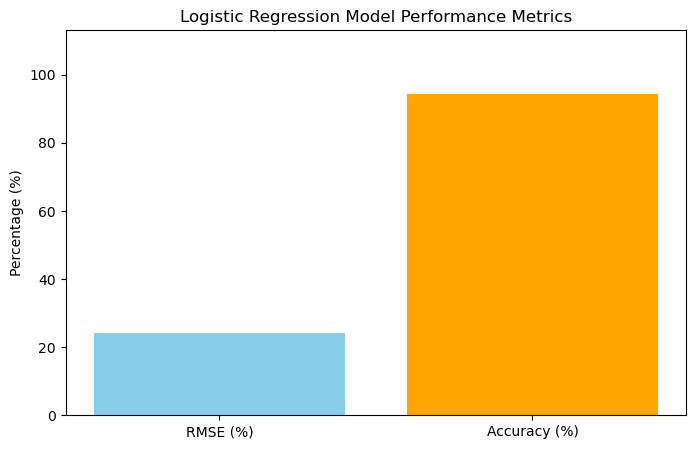

In [163]:
# Calculate RMSE and accuracy score in percentage
log_reg_rmse_percentage = Log_reg_rmse * 100
log_reg_accuracy_score = clf.score(X_test, y_test) * 100

# Plotting RMSE and accuracy score as a bar chart
plt.figure(figsize=(8, 5))
metrics = ['RMSE (%)', 'Accuracy (%)']
values = [log_reg_rmse_percentage, log_reg_accuracy_score]

plt.bar(metrics, values, color=['skyblue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Logistic Regression Model Performance Metrics')
plt.ylim(0, max(values) * 1.2)  # Adding some padding for better visualization
plt.show()


**After testing multiple models on our dataset, including Linear Regression, Lasso Regression, Ridge Regression, and Logistic Regression, we observed that Logistic Regression achieved the highest accuracy. Given this high accuracy and the suitability of Logistic Regression for binary classification tasks, we conclude that it is the best-performing model for our analysis.**

**Logistic Regression not only provides strong predictive accuracy but also offers interpretability, computational efficiency, and robustness to overfitting, especially when regularization is applied. These qualities make it an ideal choice for our dataset, allowing us to effectively predict the likelihood of stroke occurrences based on the features provided.**


# Confusion Matrix

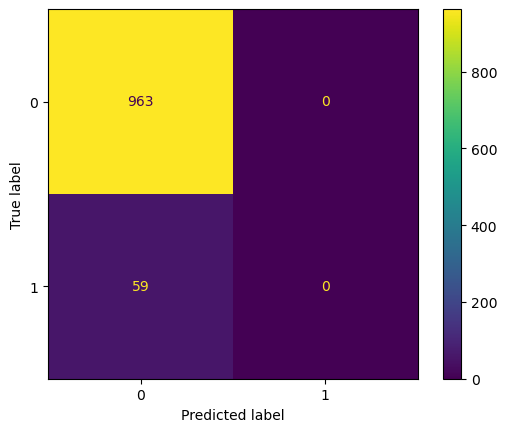

In [165]:
from sklearn import metrics

Confusion_matrix = metrics.confusion_matrix(y_test, Logistic_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [135]:
tp = Confusion_matrix[0][0]
fn = Confusion_matrix[0][1]
fp = Confusion_matrix[1][0]
tn = Confusion_matrix[1][1]

# F1 Score, Precision and Recall

In [136]:
from sklearn.metrics import f1_score

f1_score(y_test, Logistic_pred)


0.0

In [137]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [138]:
precision_score(y_test, Logistic_pred)

0.0

In [139]:
recall_score(y_test, Logistic_pred)

0.0

In [140]:
from sklearn.metrics import precision_recall_curve

In [141]:
precision, recall, thresholds = precision_recall_curve(y_test, Logistic_pred)
thresholds

array([0], dtype=int64)

# Precision Recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve')

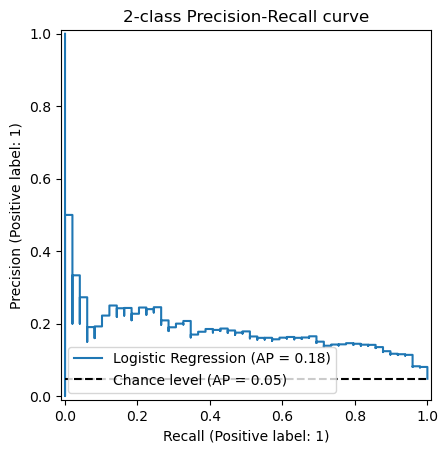

In [142]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")